In [2]:
"""
IPython Notebook v4.0 para python 2.7
Librerías adicionales: numpy, matplotlib
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. (c) Sebastian Flores.
"""

# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import HTML

HTML(open("style/mat281.css", "r").read())

<header class="w3-container w3-teal">
<img src="images/utfsm.png" alt="" height="100px" align="left"/>
<img src="images/mat.png" alt="" height="100px" align="right"/>
</header>
<br/><br/><br/><br/><br/>
# MAT281
## Aplicaciones de la Matemática en la Ingeniería

### Sebastián Flores

https://www.github.com/sebastiandres/mat281


## Clase anterior

* Fuentes de Error
* Modelo predictivo


## ¿Qué contenido aprenderemos?

* Holdout Set.


## ¿Porqué aprenderemos ese contenido?

* Holdout Set.

Esencial para poder estimar el poder predictivo de un modelo.


## Motivación

Panchulo mide el perímetro de un círculo y obtiene 2 [m]. 

¿Cuál es el radio del círculo?

$$ P =2 \pi R$$

* $\frac{1}{\pi} = 0.3183098861837907...$
* $0.3183$
* $0.3$
* Entre $0.2$ y $0.4$.
* ¿Depende del contexto?

## Motivación

Panchulo es un minero, debe medir el pilar que sostiene el techo de una  galería para verificar que la sección transversal del pilar es el indicado.

¿Cuáles son las posibles fuentes de error?

* **Medición**: Panchulo utilizó una hincha de medición.
* **Modelo**: El pilar no es perfectamente circular.
* **Interpretación**: ¿Para dónde es necesario redondear los términos, por seguridad?

## Posible Respuesta

Panchulo utilizó una huincha de medición, y puede haberse equivocado en 5 cms.

* $R_{min} = \frac{P_{min}}{2 \pi} [m] = \frac{1.95}{2 \pi} = 0.310$ [m]
* $R_{max} = \frac{P_{max}}{2 \pi} [m] = \frac{2.05}{2 \pi} = 0.326$ [m]

* Si la medición es para medir la estabilidad de la galería, conviene utilizar $R_{min}$.
* Si la medición es para calcular la cantidad de exlosivos para dinamitar el pilar, conviene utilizar $R_{max}$.

## Técnicas para entrenar un modelo

1. ***Holdout Set***
1. Cross Validation

## Observación crucial

La medición del error de predicción no necesita conocer el modelo subyacente: puede ser un sofware externo, una black box o una implementación casera.

Necesitamos:

1. Poder obtener el modelo que se ajusta de mejor manera a un set de datos datos (entrenamiento).
2. Poder realizar predicciones con un modelo ya ajustado (predicción).

## 1. Holdout Set

Se separan los datos en 2 grupos.
* El primero de los grupos permitirá entrenar el modelo y obtener los parámetros del modelo.
* El segundo de los grupos se utilizará obtener una estimación del error (predictivo) del modelo.

<img src="images/HoldoutSet.png" alt="" width="600px" align="middle"/>

#### 1. Holdout Set
## Características

* El costo del método proviene de la cantidad de datos que son retenidos del proceso de entrenamiento del modelo.
* Típicamente se separa el 30 % de los datos para el testeo del modelo.
* Esto significa que el modelo se entrena en un conjunto menor de datos, y por tanto el modelo no será tan bueno como si se entrenara en el conjunto completo de datos.

#### 1. Holdout Set
## Características

* El procedimiento estándar es reportar el error entregado en el set de predicción, pero luego obtener los mejores parámetros posibles para el modelo utilizando todos los datos simultáneamente.
* El error reportado es una estimación conservativa, puesto que al entrenar en todos los datos el error del modelo actual será menor... ¡pero ya no tenemos datos para hacer una mejor estimación!
* Predicciones conservativas son mejores que predicciones optimistas.

#### Holdout Set
## Warning

* El holdout set no debe utilizarse para nada más que el testeo final del modelo, sus datos no deben utilizarse para calibrar el modelo en ningún aspecto. 
 
* Si los datos reservados para predicción se han utilizan durante el entrenamiento, el error predictivo del modelo estará sesgado al incluir el error de entrenamiento/calibración del modelo.

#### Holdout Set
## Warning

Ilustraremos el funcionamiento del método con datos sintéticos:
$$ y(x) = 5 \cos \Big( \frac{\pi}{4} x \Big) + \mathcal{N}\Big(0,1\Big)$$

Buscaremos ajustar un modelo del tipo
$$ y(x) = a \cos \Big( b x + c\Big) + d$$
minimizando el error cuadrático.

El error predictivo del modelo será calculado utilizando RMSE:
$$ E(o,p) = \sqrt{ \frac{1}{N}\sum_{i=1}^N (o_i - p_i)^2 }$$
El RMSE corresponde a la desviación estándar de los residuos.

#### 1. Holdout Set
## Implementación Numérica
La implementación numérica del holdout set no depende del modelo a ajustar: puede realizarse para regresion lineal o logística, modelos discretos, algoritmos de machine learning, etc.

Los pasos son:
1. Realizar la partición en datos de entrenamiento y de predicción.
2. Obtener los coeficientes del modelo utilizando los datos de entrenamiento.
3. Utilizar el modelo con los coeficientes obtenidos para realizar predicción de datos en el set de predicción.
4. Comparar la predicción realizada con los datos reales, para estimar el error de predicción.
5. Obtener los coeficientes del modelo todos los datos de entrenamiento.

#### 1. Holdout Set
## Implementación Numérica

Prediction error estimated on  0.986717422877 

The obtained model parameters for training dataset are:
	(a,b,c,d) = (5.171, 0.771, -0.007, -0.193)
The obtained model parameters for the whole dataset are:
	(a,b,c,d) = (5.012, 0.786, -0.003, -0.028)
The true model parameters are:
	(a,b,c,d) = (5.000, 0.785, 0.000, 0.000)

Conservative error estimation on testing dataset: 0.99
Pure random error on testing dataset: 0.99
Pure random error on all data: 0.99


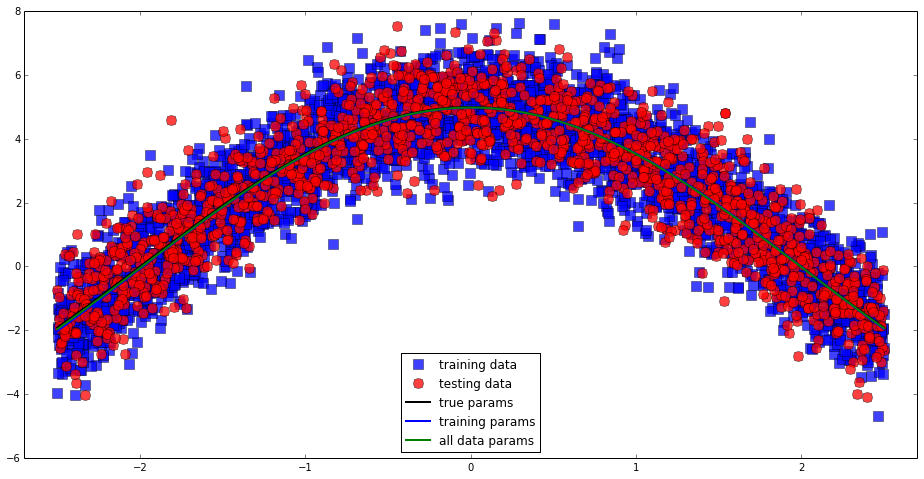

In [8]:
import numpy as np
from mat281_code import model

# Load data
data = model.load_data("data/dataN5000.txt")  # Change here
N = data.shape[0]
split = int(0.7*N)   # Change here

# Permute the data
np.random.seed(23)   # Change here
data = np.random.permutation(data)

# Do the split
training_data = data[:split,:]
testing_data = data[split:,:]

# Train model excluding the holdout set
training_params = model.get_params(training_data)

# Test with the holdout set
prediction_error = model.get_error(training_params, testing_data)
print "Prediction error estimated on ", prediction_error, "\n"

# Train model with all the data
all_data_params = model.get_params(data)

# Report
model.full_report(training_data, testing_data, training_params, all_data_params)

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

#### 1. Holdout Set
## Conclusiones
El holdout se ve afectado:
* Por la forma de seleccionar los datos. 
* Por el tamaño de la partición training-testing.
* Por el tamaño del conjunto de datos considerados.

#### 1. Holdout Set
## Comparación

¿Cuánto afecta la selección de la partición al error de predicción?

Si tenemos $N$ datos y queremos un split de $n$ datos de entrenamiento y $N-n$ datos de testing, existen
$ C^N_n = \frac{N!}{n!(N-n)!}$ posibilidades.

En nuestro caso, para $N=50$ y $n=0.7 \times 50 = 35$, tenemos $>2.5 \cdot 10^{12}$ posibles combinaciones distintas de datos.

In [9]:
from scipy.misc import comb
print comb(50,35)
print comb(50,15)

2.25082957512e+12
2.25082957512e+12


#### 1. Holdout Set
## Comparación

¿Cuánto afecta la selección de la partición al error de predicción?

Realicemos un experimento numérico sencillo...

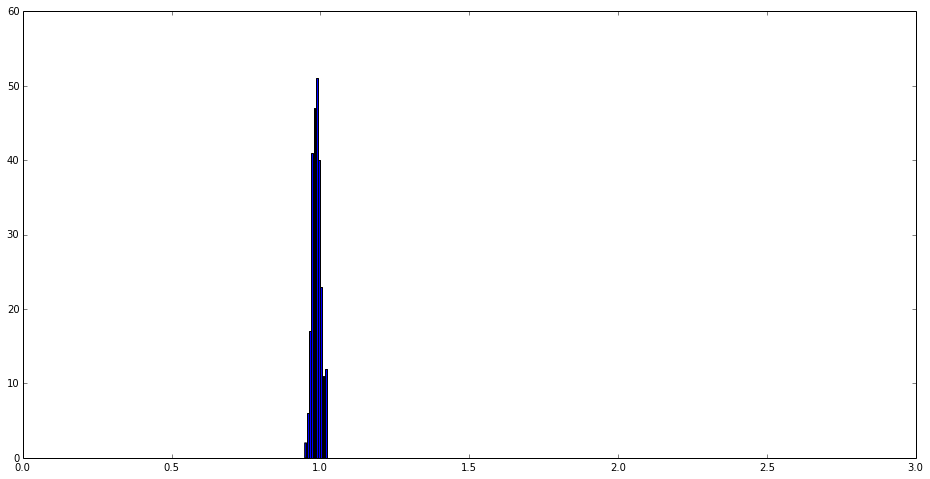

In [13]:
import numpy as np
from mat281_code import model
from matplotlib import pyplot as plt

# Number of different seeds to test 
total_seeds = 250

# Load data
data = model.load_data("data/dataN5000.txt")
N = data.shape[0]
split = int(0.7*N)

prediction_error = np.zeros(total_seeds)
for seed in range(total_seeds):
    # Permute the data
    np.random.seed(seed)
    data = np.random.permutation(data)

    # Do the split
    training_data = data[:split,:]
    testing_data = data[split:,:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[seed] = model.get_error(training_params, testing_data)

# Histogram on the prediction error
fig = plt.figure(figsize=(16,8))
plt.hist(prediction_error, rwidth=0.8)
plt.xlim(0,3)
plt.show()

#### 1. Holdout Set
## Comparación

¿Cuánto afecta la selección de la partición al error de predicción?

Realicemos un experimento numérico más general.

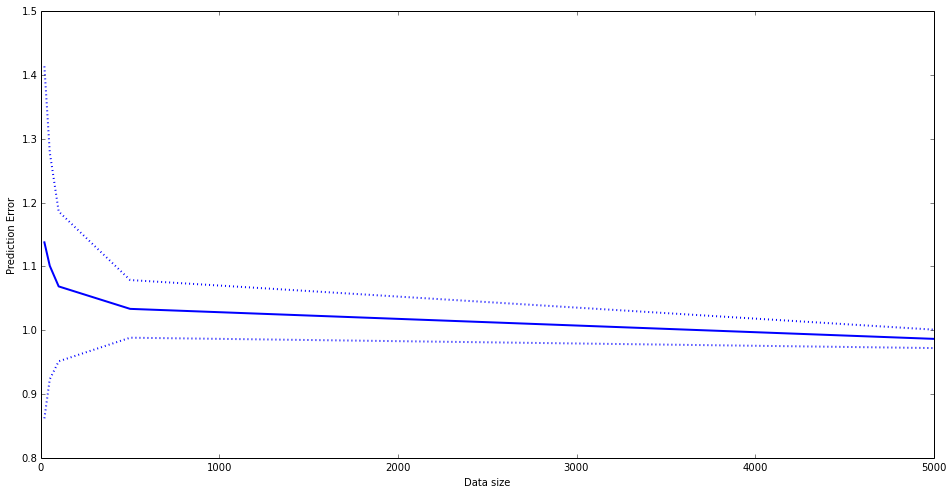

In [14]:
import numpy as np
from mat281_code import model
from matplotlib import pyplot as plt

# Number of different seeds to test 
total_seeds = 250

datasizes = (20,50,100,500,5000)
mean_prediction_error = np.zeros(len(datasizes))
std_prediction_error = np.zeros(len(datasizes))

for i, N in enumerate(datasizes):
    # Load data
    datafile = "data/dataN%d.txt" %N
    data = model.load_data(datafile)
    split = int(0.7*N)

    prediction_error = np.zeros(total_seeds)
    for seed in range(total_seeds):
        # Permute the data
        np.random.seed(seed)
        data = np.random.permutation(data)

        # Do the split
        training_data = data[:split,:]
        testing_data = data[split:,:]

        # Train model excluding the holdout set
        training_params = model.get_params(training_data)

        # Test with the holdout set
        prediction_error[seed] = model.get_error(training_params, 
                                                 testing_data)
        
    # Compute mean and std, and save into vector    
    mean_prediction_error[i] = prediction_error.mean() 
    std_prediction_error[i] = prediction_error.std() 

# Histogram on the prediction error
fig = plt.figure(figsize=(16,8))
plt.plot(datasizes, mean_prediction_error, 'b', lw=2.0)
plt.plot(datasizes, mean_prediction_error-std_prediction_error, 'b:', lw=2.0)
plt.plot(datasizes, mean_prediction_error+std_prediction_error, 'b:', lw=2.0)
plt.xlabel("Data size")
plt.ylabel("Prediction Error")
plt.show()

#### 1. Holdout Set
## Conclusiones
El holdout se ve afectado:
* Por la forma de seleccionar los datos, ***pero con impacto decreciente a medida que aumenta el tamaño del dataset considerado***.
* Por el tamaño de la partición training-testing.
* Por el tamaño del conjunto de datos considerados.

#### 1. Holdout Set
## Comparación

¿Cuánto afecta el tamaño de la partición (split) al error de predicción?

Realicemos un sencillo experimento numérico:

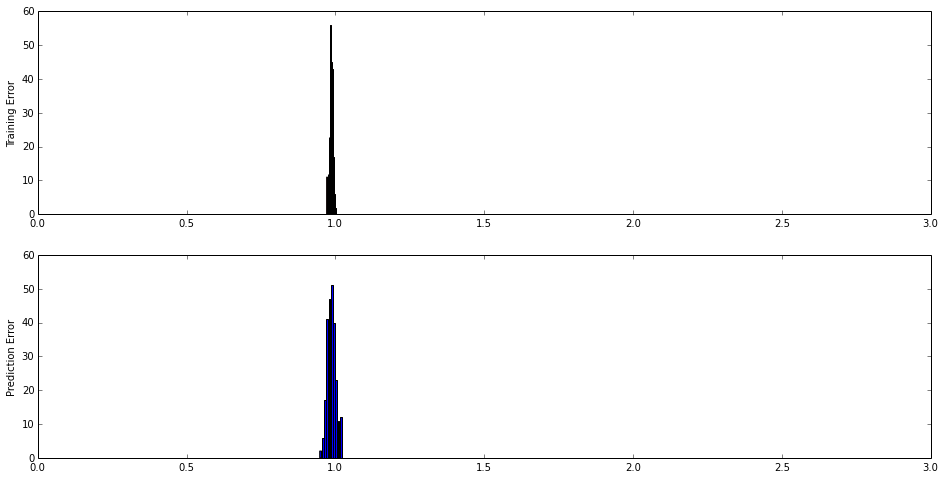

In [18]:
import numpy as np
from mat281_code import model
from matplotlib import pyplot as plt

# Number of different seeds to test 
total_seeds = 250

# Load data
data = model.load_data("data/dataN5000.txt") # Change here
N = data.shape[0]
split = int(0.7*N)  # Change here 

training_error = np.zeros(total_seeds)
prediction_error = np.zeros(total_seeds)

for seed in range(total_seeds):
    # Permute the data
    np.random.seed(seed)
    data = np.random.permutation(data)

    # Do the split
    training_data = data[:split,:]
    testing_data = data[split:,:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    training_error[seed] = model.get_error(training_params, training_data)
    prediction_error[seed] = model.get_error(training_params, testing_data)

# Histogram on the prediction error
fig = plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.hist(training_error, rwidth=0.8, color="red")
plt.ylabel("Training Error")
plt.xlim(0,3)
plt.subplot(2,1,2)
plt.hist(prediction_error, rwidth=0.8)
plt.ylabel("Prediction Error")
plt.xlim(0,3)
plt.show()

#### 1. Holdout Set
## Comparación

¿Cuánto afecta el tamaño de la partición al error de predicción?

Realicemos un experimento numérico más detallado:

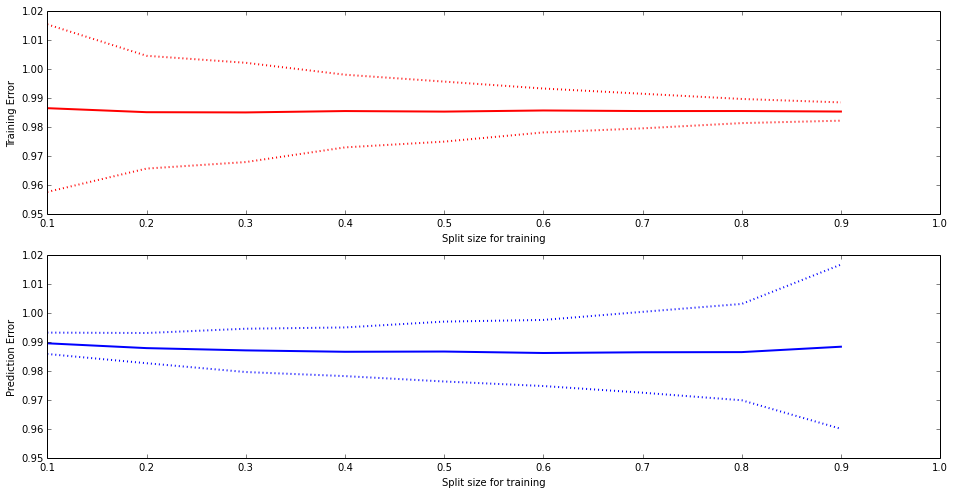

In [21]:
import numpy as np
from mat281_code import model
from matplotlib import pyplot as plt

# Number of different seeds to test 
total_seeds = 100

N = 5000 # N>=50

splitsizes = np.linspace(0.1,0.9,9)
mean_prediction_error = np.zeros(len(splitsizes))
std_prediction_error = np.zeros(len(splitsizes))
mean_training_error = np.zeros(len(splitsizes))
std_training_error = np.zeros(len(splitsizes))

for i, s in enumerate(splitsizes):
    # Load data
    datafile = "data/dataN%d.txt" %N
    data = model.load_data(datafile)
    split = int(s*N)
    split = min(max(split, 4), N-4) # Requirement for optimization
    
    prediction_error = np.zeros(total_seeds)
    training_error = np.zeros(total_seeds)
    for seed in range(total_seeds):
        # Permute the data
        np.random.seed(seed)
        data = np.random.permutation(data)

        # Do the split
        training_data = data[:split,:]
        testing_data = data[split:,:]
        
        # Train model excluding the holdout set
        training_params = model.get_params(training_data)

        # Test with the holdout set
        training_error[seed] = model.get_error(training_params, training_data)
        prediction_error[seed] = model.get_error(training_params, testing_data)
        
    # Compute mean and std, and save into vector    
    mean_training_error[i] = training_error.mean() 
    std_training_error[i] = training_error.std() 
    mean_prediction_error[i] = prediction_error.mean() 
    std_prediction_error[i] = prediction_error.std() 

# Histogram on the prediction error
fig = plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(splitsizes, mean_training_error, 'r', lw=2.0)
plt.plot(splitsizes, mean_training_error-std_training_error, 'r:', lw=2.0)
plt.plot(splitsizes, mean_training_error+std_training_error, 'r:', lw=2.0)
plt.xlabel("Split size for training")
plt.ylabel("Training Error")
plt.subplot(2,1,2)
plt.plot(splitsizes, mean_prediction_error, 'b', lw=2.0)
plt.plot(splitsizes, mean_prediction_error-std_prediction_error, 'b:', lw=2.0)
plt.plot(splitsizes, mean_prediction_error+std_prediction_error, 'b:', lw=2.0)
plt.xlabel("Split size for training")
plt.ylabel("Prediction Error")
plt.show()

#### 1. Holdout Set
## Conclusiones
El holdout se ve afectado:
* Por la forma de seleccionar los datos, pero con impacto decreciente a medida que aumenta el tamaño del dataset considerado.
* Por el tamaño de la partición training-testing, ***con impacto decreciente a medida que aumenta el tamaño del dataset considerado. Además, el split 70-30% es una buena elección para datasets medianos.***.
* Por el tamaño del conjunto de datos considerados. ***Holdout Set funciona bien para datasets medianos o grandes***.

#### 1. Holdout Set
## Pros
* No hay suposiciones paramétrica o teóricas.
* Si hay suficientes datos, es altamente precisa.
* Simple de implementar.
* Conceptualmente simple.

## Contras
* Sesgo conservativo.
* Requiere un número suficiente de datos.
* Resulta tentador utilizar datos en el set de entrenamiento, resulta en contaminación del error de prediccción.
* Se debe elegir el tamaño del set de entrenamiento (70 %-30 % común pero no obligatorio).

## 2. Cross Validation

Se realiza de manera secuencial varios procedimientos de Holdout Set. 
Los datos se utilizan para entrenar el modelo o para testear el modelo, pero nunca para ambas simultáneamente.

<img src="images/CrossValidation.png" alt="" width="400px" align="middle"/>

#### 2. Cross Validation
## Características

* Es similar al holdout set.

* Datos son utilizados tanto para entrenar el modelo, como para el error de predicción pero nunca simultáneamente.

* Permite obtener estimación de la variablidad del verdadero error de estimación.

#### 2. Cross Validation
## ¿Qué tipo de partición utilizar para Cross Validation?

* Si se usan pocas particiones, el error de predicción tendrá una estimación promedio conservadora y con poca variabilidad.
* Si se usan muchas particiones, el error de predicción tendrá una estimación promedio realista pero con mucha variabilidad.
* Resulta necesario considerar además el tiempo computacional requerido para entrenar los modelos en cada partición.

#### 2. Cross Validation
## Pros
* No hay suposiciones paramétricas o teóricas.
* Si hay suficientes datos, es altamente precisa.
* Conceptualmente simple.

## Contra
* Sesgo conservativo.
* Computacionalmente intensiva.
* Datos deben manejarse con cuidado al calcular el error de prediccción.
* Se debe elegir el tamaño del set de entrenamiento y del número de particiones.

#### 2. Cross Validation
## Alternativas

¿Cómo hacermos las particiones?

* Validación Cruzada no Exhaustiva.
* Validación Cruzada no Exhaustiva Aleatoria.
* Validación Cruzada: Leave One Out (LOO).
* Validación Cruzada Exhaustiva.


#### 2. Cross Validation

TO BE CONTINUED...

#### 2.1 Validación Cruzada No Exhaustiva

* Se seleccionan $N$ particiones excluyentes. Un dato es utilizado una única vez como predicción y $N-1$ veces para entrenamiento.
* Requiere realizar mezclar aleatoriamente los datos al inicio.
* Típicamente 5 particiones de 80%-20% o 10 particiones de 90%-10%.

In [ ]:
# Load and randomize data

# Select split size

# Do all partitions and compute the error

# Compute the mean error and std

# Compute final model

#### 2.1 Validación Cruzada No Exhaustiva

## Pro
* Simple de realizar y computacionalmente no TAN intensivo.
* Entrega buenos resultados.

## Contra
* Error de predicción conservador y con estimación de variabilidad. 
* Valor depende de la mezcla aleatoria inicial.

#### 2.1 Leave One Out (LOO)

Si el número de datos $N$ es pequeño, se hacen $N$ particiones: Se entrena con $N-1$ datos y se prueba con $1$ datos.

* Fácil de implementar
* 

#### 2.1 Leave One Out (LOO)
## Implementación

In [ ]:
index = range(N)
for i in range(N):
# Do the split
training_index = index[:i]+index[(i+1):]
prediction_index = i
training_data = data[training_index,:]
prediction_data = data[prediction_index,:]

#### 2.2 Validación Cruzada: Leave One Out

## Pro
* No es necesario configurar: tamaño y numero de particiones fijo.
* Completamente exhaustivo: no contiene aleatoriedad.

## Contra
* Computacionalmente intensivo: sólo para modelos "baratos" de conseguir y tamaños de datos pequeños.
* Estimación de error optimista (?).

#### 2.2 Validación Cruzada No Exhaustiva

## Pro
* No es necesario configurar: tamaño y numero de particiones fijo.
* Completamente exhaustivo: no contiene aleatoriedad.

## Contra
* Computacionalmente intensivo. 


#### 2.3  Validación Cruzada Aleatoria

Seleccionar el número de particiones y el tamaño
testear el error de predicci on
separando los datoss de entrenamiento y
de testeo de manera aleatoria.